In [1]:
import pandas as pd
base=pd.read_csv('house-prices.csv')

In [2]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
base.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [5]:
base.shape

(21613, 21)

In [10]:
x=base.iloc[:,5].values
#acrescentar outra coluna
x=x.reshape(-1,1)

In [11]:
x.shape

(21613, 1)

In [13]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [14]:
#dessa forma nao precisa do reshape
y=base.iloc[:,2:3].values

In [15]:
y.shape

(21613, 1)

In [16]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x= scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y= scaler_y.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
x

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [19]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

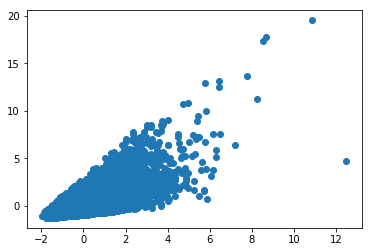

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

# formula da regressao linear simples
y=b0+b1*x

In [22]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [23]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
b0=tf.Variable(0.41)
b1=tf.Variable(0.72)

In [27]:
#para nao sobrecarregar a memoria enviando os 21k de um vez, sera utilizado batch
batch_size=32
#placeholder é uma variavel que fica a espera dos dados, para na hora do treinamento
#sera criado uma sessao que usara ela
xph=tf.placeholder(tf.float32,[batch_size,1])
yph=tf.placeholder(tf.float32,[batch_size,1])

In [30]:
y_modelo = b0+b1*xph
erro=tf.losses.mean_squared_error(yph,y_modelo)
otimizador=tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento=otimizador.minimize(erro)
init=tf.global_variables_initializer()

In [35]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        indices=np.random.randint(len(x),size=batch_size)
        feed={xph: x[indices],yph: y[indices]}
        sess.run(treinamento,feed_dict=feed)
    b0_final, b1_final =  sess.run([b0,b1])        

In [36]:
b0_final

0.0012618856

In [37]:
b1_final

0.6896186

In [38]:
previsoes=b0_final+b1_final*x

In [39]:
previsoes

array([[-0.67445056],
       [ 0.36926605],
       [-0.98230941],
       ...,
       [-0.7945906 ],
       [-0.35908295],
       [-0.7945906 ]])

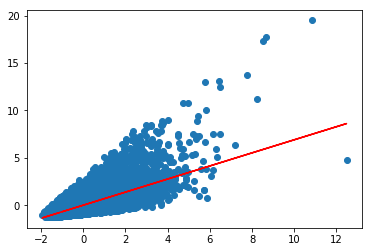

In [43]:
plt.plot(x,y,'o')
plt.plot(x, previsoes,color='red')

In [44]:
y1=scaler_y.inverse_transform(y)
previsoes=scaler_y.inverse_transform(previsoes)

In [45]:
y1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [46]:
previsoes

array([[292484.72777234],
       [675652.61356822],
       [179463.98448003],
       ...,
       [248379.07185339],
       [408262.07455959],
       [248379.07185339]])

In [48]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y1,previsoes)
mae


173022.90998831365